In [491]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from numpy.matlib import repmat
from math import prod, floor, ceil

In [544]:
angled = 3.8909
angle = np.deg2rad(angled)
freq = round(1/np.sin(angle))
print(freq)
pad = 40
mul = 1.0
pw = (round((freq*6+pad)*mul), round((freq*6+pad)*mul))
struct = np.zeros(pw)
im = Image.fromarray(struct)
draw = ImageDraw.Draw(im)
for i in np.arange(3*mul, pw[0], 6*mul):
    for j in np.arange(3*mul, pw[1], 6*mul):
        r = 2.0 * mul
        draw.ellipse((i-r+0.5, j-r+0.5, i+r-0.5, j+r-0.5), fill = 'blue', outline ='blue')
im = im.rotate(angled, resample=Image.BICUBIC, expand=False)
pad2 = round(pad / 2 * mul)
im = np.array(im)[pad2:-pad2, pad2:-pad2]
im = Image.fromarray(im)
ds = 1
im = im.resize((round(im.size[0]//ds)-2, round(im.size[1]//ds)-2), resample=Image.ANTIALIAS)
im = np.array(im)
im-=im.min()
im /= im.max()
print(im.max())

15
1.0


(<matplotlib.image.AxesImage at 0x7efdec620ac0>,
 Text(0.5, 1.0, 'Back to  real space 1x1'))

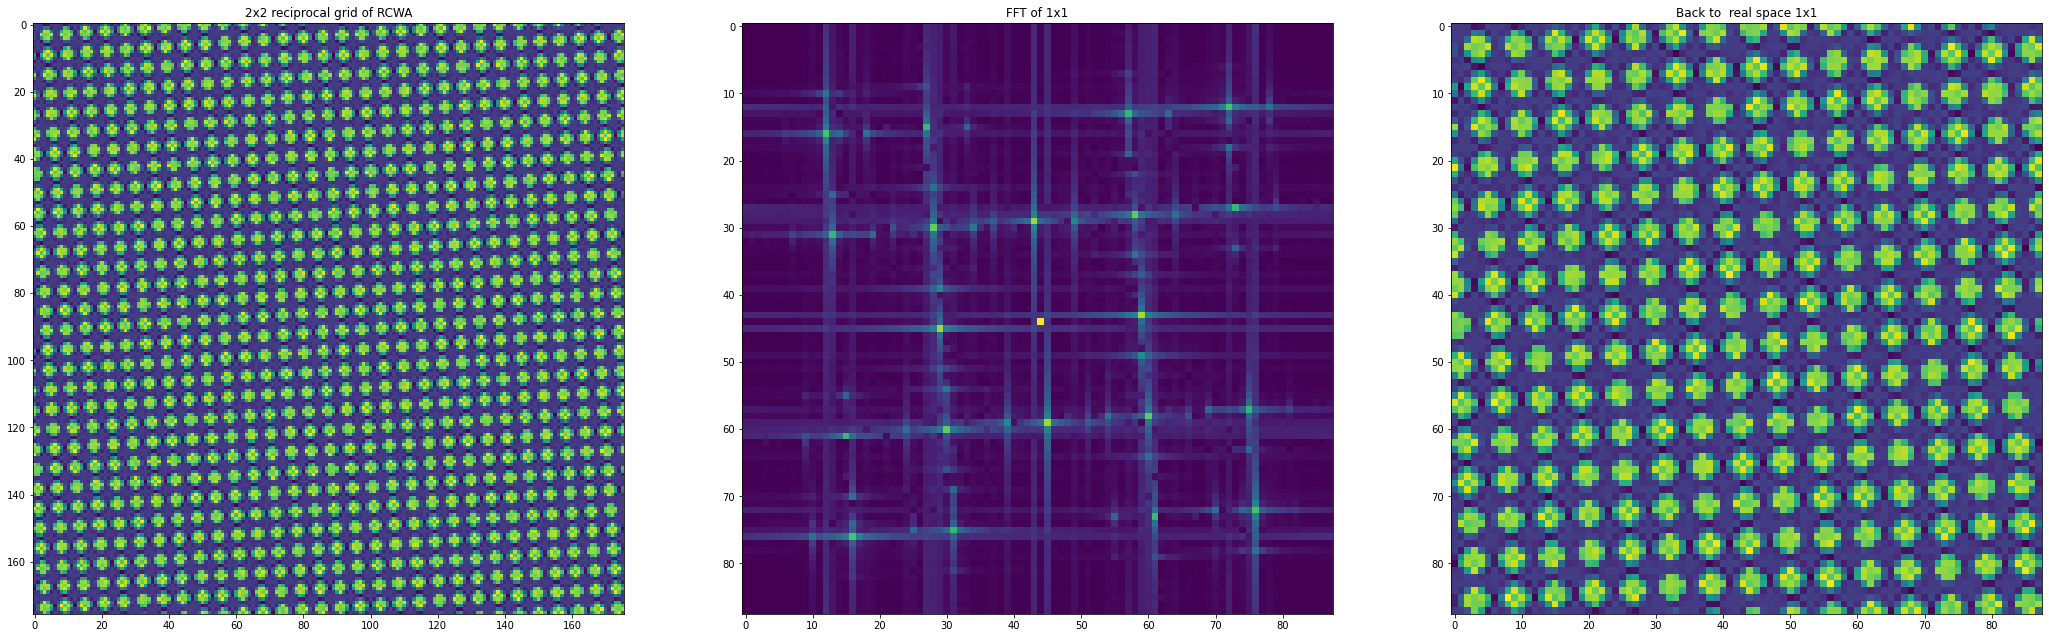

In [545]:
fig, axs = plt.subplots(1,3,figsize=(12*3,12))
axs[0].imshow(repmat(im, 2, 2)), axs[0].set_title("2x2 reciprocal grid of RCWA")
fft = np.fft.fftshift(np.fft.fft2(im))
axs[1].imshow(np.log1p(np.abs((fft)))), axs[1].set_title("FFT of 1x1")
#np.save("fft_straight_5.npy", fft / prod(fft.shape))
#np.save("fft_twisted_5.npy", fft / prod(fft.shape))
im2 = np.array(im).copy()
fft = np.fft.fftshift(fft)
axs[2].imshow(np.abs(np.fft.ifft2(fft))), axs[2].set_title("Back to  real space 1x1")
#x = np.linspace(0.0, 120, 3)
#axs[0].plot(tan(5.04)*x,x)

In [433]:
print("FFT SHAPE IS:", fft.shape)
nn = 4* (fft.shape[0]//2)**2
print("S-matrix order is :", nn)
print("Required memory for eig is: ",8*(nn**2 * 4 + nn*3)/1e9, "Gb") 

FFT SHAPE IS: (64, 64)
S-matrix order is : 4096
Required memory for eig is:  0.536969216 Gb


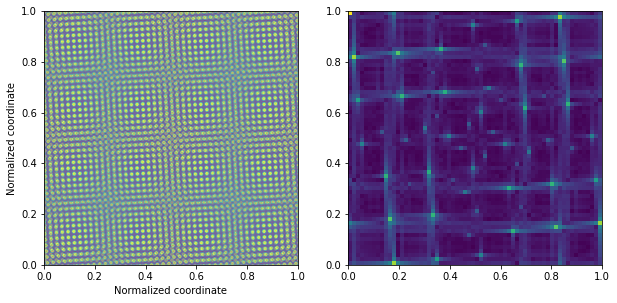

In [434]:
from numpy.matlib import repmat
rep = 4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(repmat(im1, rep, rep), extent=[0, 1, 0, 1], alpha=0.5)
ax1.imshow(repmat(im2, rep, rep), extent=[0, 1, 0, 1], alpha=0.5)
ax1.set_xlabel("Normalized coordinate")
ax1.set_ylabel("Normalized coordinate")
ax2.imshow(np.log1p(np.abs(fft)), extent=[0, 1, 0, 1], alpha=1.0)
plt.savefig("twisted_real_4x4x177x177.png")

In [436]:
np.save("im2.npy", im2)

In [9]:
from bast.fourier import transform
from bast.lattice import CartesianLattice

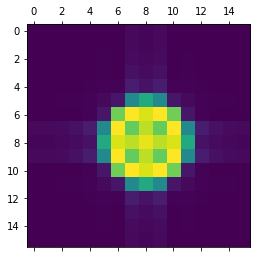

In [268]:
pw = 8,8
a = 1e-7
lattice = CartesianLattice(pw, (a,0), (0, a))
at = transform("disc", [a/2,a/2, 0.2*a], lattice.Gx, lattice.Gy, lattice.area)
ar = np.fft.ifft2(at) 
plt.matshow(np.abs(ar))

In [202]:

nt = np.fft.fft2(ar)


In [179]:
np.allclose(nt, at)

True

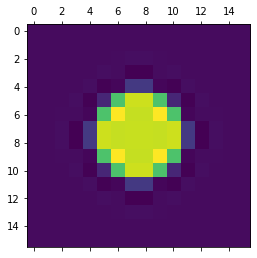

In [269]:
img = np.zeros((128, 128))
x = np.linspace(-1, 1.0, 128, endpoint=True)
X, Y = np.meshgrid(x,x)
img[X**2+Y**2<=0.4**2]=1

im = Image.fromarray(img)
im = im.resize((16, 16), resample=Image.ANTIALIAS)
img = im 
plt.matshow(img)



In [279]:
np.save("fft_disc.npy", nt)

In [278]:
nt = np.fft.fftshift(np.fft.fft2(img))/32/32

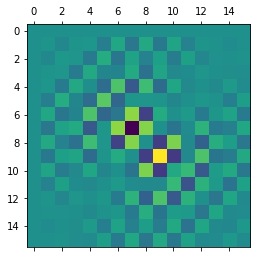

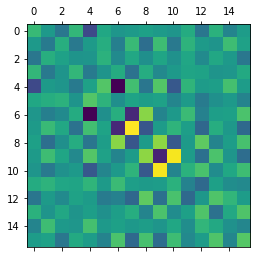

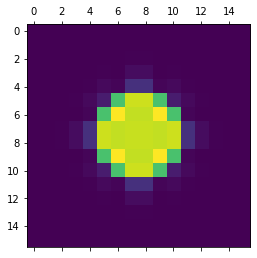

In [272]:
plt.matshow(np.imag(nt))
plt.matshow(np.imag(at))
plt.matshow(np.abs(np.fft.ifft2(nt)))

In [238]:
np.max(np.imag(at))

5.3638552715885206e-17

In [239]:
np.max(np.imag(nt))

0.01079703353581422

In [121]:
%pip install scikit-image

     |████████████████████████████████| 13.8 MB 12.3 MB/s            
     |████████████████████████████████| 3.3 MB 11.0 MB/s            
     |████████████████████████████████| 6.9 MB 10.6 MB/s            
     |████████████████████████████████| 178 kB 11.6 MB/s            
     |████████████████████████████████| 1.9 MB 12.3 MB/s            
You should consider upgrading via the '/home/kaeryv/prj/minerva/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [206]:
ar

array([[-1.27150268e-07-6.53128301e-20j, -1.28527003e-07-6.99523145e-20j,
        -1.32785343e-07+8.83421138e-21j, ...,
        -1.40337255e-07+2.15762486e-19j, -1.32785343e-07+3.67260436e-21j,
        -1.28527003e-07-7.30228090e-20j],
       [-1.28527003e-07-7.33933859e-20j, -1.29918613e-07+6.88964118e-20j,
        -1.34222954e-07-1.62289581e-19j, ...,
        -1.41856431e-07+6.45024284e-20j, -1.34222954e-07-1.44607769e-19j,
        -1.29918613e-07+5.72497088e-20j],
       [-1.32785343e-07+1.42605162e-20j, -1.34222954e-07-1.61071972e-19j,
        -1.38669567e-07-5.41333817e-20j, ...,
        -1.46555301e-07-1.72389831e-21j, -1.38669567e-07-7.81150020e-20j,
        -1.34222954e-07-1.47254747e-19j],
       ...,
       [-1.40337255e-07+2.16556580e-19j, -1.41856431e-07+4.61324013e-20j,
        -1.46555301e-07+3.94630788e-20j, ...,
        -1.54888296e-07+2.47038029e-19j, -1.46555301e-07+8.01698059e-21j,
        -1.41856431e-07+6.72023459e-20j],
       [-1.32785343e-07+1.42075766e-20j, -1.

-1.0

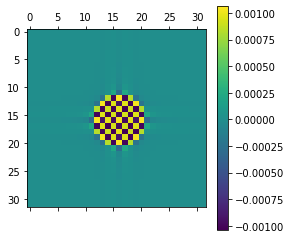

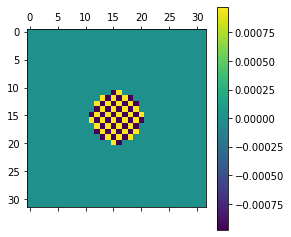

In [251]:
plt.matshow(ar.real)
plt.colorbar()
plt.matshow(img.real/32/32*cb)
plt.colorbar()
np.min(img.real*cb)

In [248]:

def checkerboard(shape):
    return np.indices(shape).sum(axis=0) % 2
cb = 2*(checkerboard((32,32))-0.5)

array([[-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       ...,
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.]])

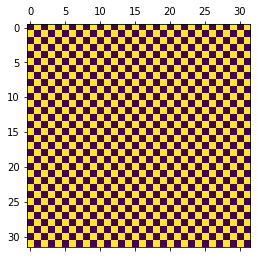

In [249]:
plt.matshow(cb)
cb

In [516]:
from math import sin, pi, cos, tan, sqrt, radians

In [511]:
cos(pi*5.04/180)

0.9961336091431725

In [523]:
gamma = 3
delta = 1



In [495]:
1/sin(5/180*pi)

11.473713245669856

In [515]:
degrees(pi)

180.0